# AMMI Bootcamp - Probability and Statistics - Tutorials

In [ ]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import colors
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d
import os
import matplotlib.pyplot as plt
import typing

# Distribution Functions

### Sigmoid (logistic) function

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

$$
\frac{d}{dx}\sigma(x) = σ(x)(1-σ(x))
$$

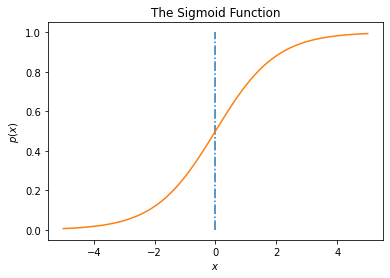

In [ ]:
def sigmoid(x: np.ndarray) -> np.ndarray:
  """Computes the sigmoid of given inputs
  Args:
    x: inputs of shape N X 1

  Returns:
    probs: shape N X 1
  """
  S = 1/(1+np.exp(-x))

  return S #None

x = np.linspace(-5, 5, 100)
y = sigmoid(x)
plt.plot(np.zeros(10), np.linspace(0,1, 10), "-.")
plt.title("The Sigmoid Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.plot(x, y)
plt.show()

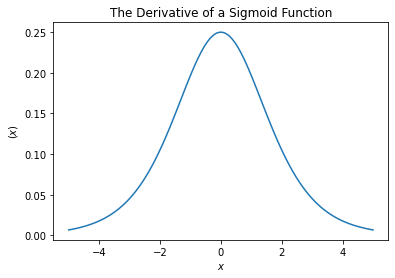

In [ ]:
def d_sigmoid(x: np.ndarray) -> np.ndarray:
  """Computes the derivative of the sigmoid function
  Args:
    x: inputs of shape N X 1
    
  Returns:
    probs: shape N X 1
  """
  deriv_sigmoid = sigmoid(x) * (1 - sigmoid(x))
  return deriv_sigmoid

x = np.linspace(-5, 5, 100)
y = d_sigmoid(x)

plt.title("The Derivative of a Sigmoid Function")
plt.xlabel("$x$")
plt.ylabel("$(x)$")
plt.plot(x, y)
plt.show()

### Softmax function


In [ ]:
def softmax_function(logits: np.ndarray):
  """Computes the softmax function given logits
  Args:
    logits: size Number of samples (N) X Number of classes to distribute probability over (C)

  Returns:
    probability distribution over categorical variables
  """
  soft_res= np.exp(logits)/np.sum(np.exp(logits), 1, keepdims=True)
  return soft_res


def better_softmax_function(logits: np.ndarray):
  """Computes the softmax function from logits using the more efficient logsumexp trick
  Args:
    logits: size Number of samples (N) X Number of classes to distribute probability over (C)

  Returns:
    probability distribution over categorical variables
  """

  def log_sum_exp(logits):
    m = np.max(logits, -1, keepdims=True)
    return m + np.log(np.exp(logits - m).sum(-1, keepdims=True))
    # raise NotImplementedError

  return np.exp(logits - log_sum_exp(logits))

In [ ]:
logits = np.random.normal(0,1, (5,3))
logits

array([[ 1.60828069,  0.45067901, -1.08873595],
       [-0.94942827, -0.89453711,  0.56079175],
       [-1.35802522,  1.44534874, -0.14998139],
       [-1.03996011, -0.53023822,  0.827689  ],
       [-0.65553839,  0.12443618,  0.25039599]])

In [ ]:
# Create random logits that the naive softmax function should be able to compute easily
# logits = np.random.normal(0,1, (5,3))

softmax_function(logits)

array([[0.7237748 , 0.22743821, 0.04878699],
       [0.15187984, 0.16044975, 0.68767041],
       [0.04796818, 0.79148565, 0.16054618],
       [0.10943446, 0.18218957, 0.70837596],
       [0.17681404, 0.38570511, 0.43748085]])

In [ ]:
better_softmax_function(logits)

array([[0.7237748 , 0.22743821, 0.04878699],
       [0.15187984, 0.16044975, 0.68767041],
       [0.04796818, 0.79148565, 0.16054618],
       [0.10943446, 0.18218957, 0.70837596],
       [0.17681404, 0.38570511, 0.43748085]])

In [ ]:
# Create logits with large values and observe what the naive softmax produces as opposed the better softmax function
big_logits = np.random.randint(1000, 2000, size=(5,3))
big_logits

array([[1725, 1993, 1624],
       [1879, 1065, 1191],
       [1326, 1040, 1622],
       [1519, 1702, 1612],
       [1926, 1325, 1137]])

In [ ]:
softmax_function(big_logits)

<ipython-input-64-42ea1127a94c>:9: RuntimeWarning: overflow encountered in exp
  soft_res= np.exp(logits)/np.sum(np.exp(logits), 1, keepdims=True)
<ipython-input-64-42ea1127a94c>:9: RuntimeWarning: invalid value encountered in true_divide
  soft_res= np.exp(logits)/np.sum(np.exp(logits), 1, keepdims=True)


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
better_softmax_function(big_logits)

array([[4.06517129e-117, 1.00000000e+000, 5.56334737e-161],
       [1.00000000e+000, 0.00000000e+000, 1.60470960e-299],
       [2.81082208e-129, 1.74024956e-253, 1.00000000e+000],
       [3.34279552e-080, 1.00000000e+000, 8.19401262e-040],
       [1.00000000e+000, 9.75026403e-262, 0.00000000e+000]])

In [ ]:
# Create logits with very small values and observe what the naive softmax function produces as opposed to the better softmax function
small_logits = np.random.randint(-2000, -1000, size = (5,3))
small_logits

array([[-1485, -1440, -1440],
       [-1586, -1107, -1459],
       [-1111, -1246, -1634],
       [-1614, -1923, -1318],
       [-1420, -1028, -1959]])

In [ ]:
softmax_function(small_logits)

<ipython-input-64-42ea1127a94c>:9: RuntimeWarning: invalid value encountered in true_divide
  soft_res= np.exp(logits)/np.sum(np.exp(logits), 1, keepdims=True)


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
better_softmax_function(small_logits)

array([[1.43125929e-020, 5.00000000e-001, 5.00000000e-001],
       [9.39600347e-209, 1.00000000e+000, 1.34382393e-153],
       [1.00000000e+000, 2.34555134e-059, 7.31115455e-228],
       [2.81082208e-129, 1.78582315e-263, 1.00000000e+000],
       [5.70904011e-171, 1.00000000e+000, 0.00000000e+000]])

# Gaussian Distributions

In [ ]:
scalar = typing.Union[float, int]


Write a function to compute the probability density function for a univariate gaussian distribution.
$$
p(x| \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2 \right)
$$

In [ ]:
def univariate_gaussian_pdf(x: np.ndarray,
                            mu: scalar,
                            sigma: scalar):
  
  raise NotImplementedError

In [ ]:
x = np.linspace(-5, 5, 100)
mean, sigma = 0., 0.7
y = univariate_gaussian_pdf(x, mean, sigma) 

In [ ]:
def plot_univariate_gaussian(x: np.ndarray):
  y = univariate_gaussian_pdf(x, mean, sigma)
  plt.plot(x, y)
  plt.plot(mean, 0, marker="x", markeredgecolor="red")
  plt.title("Univariate Gaussian")

plot_univariate_gaussian(x)

Write a function that computes the probability density function for a  multivariate Gaussian distribution

$$
\mathcal{N}(y|\mu, Σ) = \frac{1}{(2\pi)^{D/2}|Σ|}\exp\left(-\frac{1}{2}(y-\mu)^T(y-\mu)\right)
$$

In [ ]:
def multivariate_gaussian_pdf(X: np.ndarray,
                              mean: np.ndarray,
                              covariance: np.ndarray):
  """Multivariate Gaussian PDF"""
  D = X.shape[0]
  raise NotImplementedError

# Maximum Likelihood Estimation - For Normal Distribution

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this tutorial, we are interested in finding good parameters $\boldsymbol\theta$.

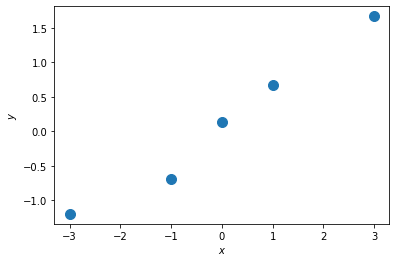

In [ ]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [ ]:
np.linalg.inv(np.dot(X.T, X))

In [ ]:
## EDIT THIS FUNCTION
def maximum_likelihood_estimate(X: np.ndarray, y: np.ndarray):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    raise NotImplementedError

In [ ]:
# get maximum likelihood estimate
theta_ml = maximum_likelihood_estimate(X,y)
print(theta_ml)

assert np.any(theta_ml[0]), "max_lik_estimate is not implemented"

[[0.499]]


In [ ]:
## EDIT THIS FUNCTION
def predict_with_estimate(Xtest: np.ndarray, theta: np.ndarray):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = None
    
    return prediction 

ValueError: ignored

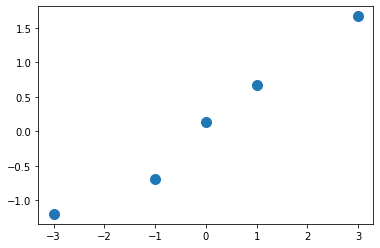

In [ ]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

assert not np.array_equal(ml_prediction, Xtest), "predict_with_estimate not implemented"

# plot
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")